# Skill Check 7

The block below imports the necessary packages, sets up the **moons** dataset you will work with, and sets the random seed for repeatability.

In [1]:
import numpy as np
import pandas as pd
import pylab as plt

from sklearn.datasets import make_moons

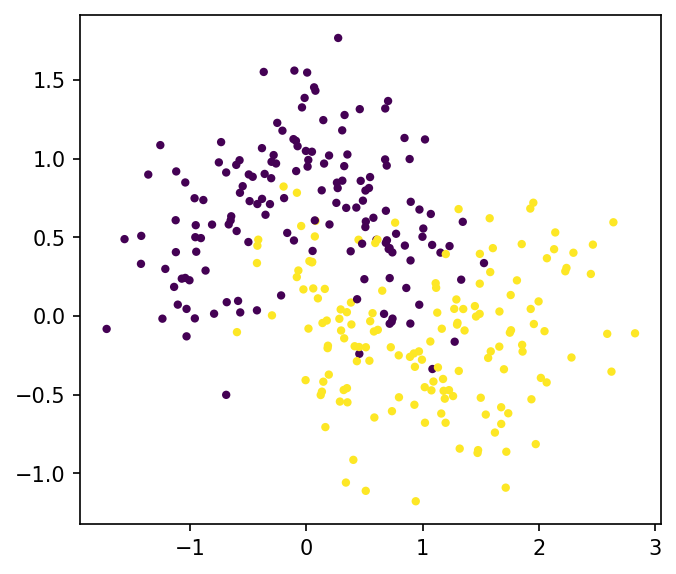

In [2]:
np.random.seed(42)

X_moon, y_moon = make_moons(n_samples = 300, noise = 0.3)

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
ax.scatter(X_moon[:, 0], X_moon[:, 1], c = y_moon, marker = '.');

## 1. k-Nearest Neighbors (35 pts)

In this problem, you will create a function `kNN` that implements the k-nearest neighbors algorithm. As it is covered in the GitHub lecture notes, you need 3 functions to implement kNN:

- distance metric (`distance`) - calculate the distance between 2 points.
- get neighbors (`get_neighbor_idxs`) - find the **k** points nearest to a given point.
- assign class (`assign_class`) - poll the neighbors to assign the point to a class.

`get_neighbor_idxs` and `assign_class` functions are given for you.

### 1a: Distance function
First, create a function `distance` that computes the Euclidean distance between two points. This function takes two parameters: (15 pts)

- x1: coordinates of point 1 (numpy.ndarray)
- x2: coordinates of point 2 (numpy.ndarray)

In [3]:
def get_neighbor_idxs(x, x_list, k):
    dist_pairs = []
    for i, xi in enumerate(x_list):
        dist = distance(x, xi)
        dist_pairs.append([dist, i, xi])
    dist_pairs.sort()
    k_dists = dist_pairs[:k]
    kNN_idxs = [i for di, i, xi in k_dists]
    return kNN_idxs

from scipy.stats import mode

def assign_class(x, x_list, y_list, k):
    neighbors = get_neighbor_idxs(x, x_list, k)
    y_list = list(y_list)
    votes = [y_list[i] for i in neighbors]
    assignment = mode(votes)[0][0]
    return assignment

In [4]:
def distance(x1, x2):
########################################
# Start your code here
    return np.linalg.norm(x1 - x2)
########################################

In [5]:
np.random.seed(0)
a = np.random.rand(3)
np.random.seed(2)
b = np.random.rand(3)

assert np.isclose(distance(a, b), 0.7004508626162435), "test run #1 failed"

np.random.seed(10)
c = np.random.rand(14)
np.random.seed(42)
d = np.random.rand(14)

assert np.isclose(distance(c, d), 1.7310336879284955), "test run #2 failed"

### 1b: kNN function

Create a function `kNN` by wrapping all of the functions above, while taking the following arguments: (10 pts)

- `X`: test set (numpy.ndarray)
- `k`: the number of neighbors considered (integer)
- `X_train`: feature matrix of the training set (numpy.ndarray)
- `y_train`: classes of the training set (numpy.ndarray)

`kNN` should return the predicted classes of each data point in `X`.

In [6]:
def kNN(X, k, X_train, y_train):
########################################
# Start your code here
    y_hat = []
    for xi in X:
        y_hat.append(assign_class(xi, X_train, y_train, k))
    return np.array(y_hat)
########################################

In [7]:
from sklearn.metrics import accuracy_score, recall_score

y_knn_2 = kNN(X_moon, 2, X_moon, y_moon)
assert np.isclose(accuracy_score(y_moon, y_knn_2), 0.9366666666666666), "2-NN not correct"

y_knn_10 = kNN(X_moon, 10, X_moon, y_moon)
assert np.isclose(recall_score(y_moon, y_knn_10), 0.8933333333333333), "10-NN not correct"

### 1c: Modified kNN

Create a function `kNN_L1` that also implements the k-nearest neighbors algorithm but, in this case, computes the Manhattan distance instead of the Euclidean distance. This function takes the same arguments as the previous `kNN` function does. (10 pts)

***Hint***:
You may need to modify the `distance` **or** `get_neighbor_idxs` function before defining the `kNN_L1` function.

In [8]:
########################################
# Start your code here
# Modify functions above as necessary
def distance(x1, x2):
    return np.linalg.norm(x1 - x2, 1)
########################################

In [9]:
def kNN_L1(X, k, X_train, y_train):
########################################
# Start your code here
    y_hat = []
    for xi in X:
        y_hat.append(assign_class(xi, X_train, y_train, k))
    return np.array(y_hat)
########################################

In [10]:
from sklearn.metrics import accuracy_score, recall_score

y_knn_3 = kNN_L1(X_moon, 3, X_moon, y_moon)
assert np.isclose(accuracy_score(y_moon, y_knn_3), 0.9233333333333333), "3-NN not correct"

y_knn_11 = kNN_L1(X_moon, 11, X_moon, y_moon)
assert np.isclose(recall_score(y_moon, y_knn_11), 0.9133333333333333), "11-NN not correct"

## 2. Perovskite Dataset (40 pts)

### 2a: Read in the data
Read in the file `perovskite_data.csv`. You need to assign the data extracted from the file to two variables: (20 pts)

- `X_perov`: a feature matrix in which all continuous features **except `t` and `tau`** are included (numpy.ndarray)
- `y_perov`: outputs (numpy.ndarray)

In [11]:
########################################
# Start your code here
df = pd.read_csv('perovskite_data.csv')

X_perov = df[df.columns[4:10]].values
y_perov = df['exp_label'].values
########################################

In [12]:
assert X_perov.shape == (576, 6), "feature selection not correct"
assert type(X_perov) == np.ndarray, "data type not correct"
assert type(y_perov) == np.ndarray, "data type not correct"

### 2b: High-dimensional classification

In this problem you will predict `y_perov` with a support vector machine classifier. The below are the instructions step by step: (10 pts)

- Declare a `sklearn.svm.SVC` object `svc` with `kernel = 'rbf'`.
- Given the list of $\mathrm{\alpha}$ and $\mathrm{\sigma}$ below, find the optimum $\mathrm{\alpha}$ and $\mathrm{\sigma}$ that return the highest accuracy score using `GridSearchCV` for `X_perov` and `y_perov`. You need to use 3-fold cross-validation.
- Report the optimum $\mathrm{\alpha}$ as `opt_alpha` and optimum $\mathrm{\sigma}$ as `opt_sigma`.

In [13]:
sigmas = np.array([1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3])
alphas = np.array([1e-6, 5e-5, 1e-5, 5e-4, 1e-4])

In [14]:
########################################
# Start your code here
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel = 'rbf')
param_grid = {'C': 1 / alphas, 'gamma': 1 / 2 / sigmas**2}

gcv = GridSearchCV(svc, param_grid, cv = 3)
gcv.fit(X_perov, y_perov)

opt_alpha = 1 / gcv.best_estimator_.C
opt_sigma = 1 / np.sqrt(2 * gcv.best_estimator_.gamma)
########################################

In [15]:
opt_svc = SVC(kernel = 'rbf', C = 1 / opt_alpha, gamma = 1 / 2 / opt_sigma**2)
opt_svc.fit(X_perov, y_perov)

assert np.isclose(opt_svc.score(X_perov, y_perov), 0.9288194444444444)

### 2c: Two-dimensional classification

Now, you will predict `y_perov` only with `rA (Ang)` and `rB (Ang)`. Create a `X_perov_part` that contains these two features only. Repeat **2b** with `X_perov_part` and find the optimal hyperparameter that gives the highest **precision**. Save the prediction on `X_perov_part` from the optimized model to `y_hat`. Report the final accuracy score between `y_perov` and `y_hat` as `acc`. (10 pts)

In [16]:
########################################
# Start your code here
from sklearn.metrics import accuracy_score

X_perov_part = X_perov[:, 3:5]

gcv = GridSearchCV(svc, param_grid, scoring = 'precision', cv = 3)
gcv.fit(X_perov_part, y_perov)

y_hat = gcv.best_estimator_.predict(X_perov_part)

acc = accuracy_score(y_perov, y_hat)
########################################

In [17]:
assert np.isclose(np.linalg.norm(X_perov_part), 37.86688791015179), "X_perov_part not correct"
assert np.isclose(y_hat.sum() * acc, 59.888888888888886), "y_hat not correct"

## 3. Decision Tree (25 pts)

In this problem you will use the built-in decision tree classifier from `scikit-learn` to construct and optimize a decision tree model.

### 3a: Import the object

Import a `DecisionTreeClassifier` from `sklearn.tree`. (5 pts)

In [18]:
########################################
# Start your code here
from sklearn.tree import DecisionTreeClassifier
########################################

In [19]:
assert DecisionTreeClassifier.__init__, "DecisionTreeClassifier not imported"

### 3b: Train/test split

Do train/test split for `X_perov_part` and `y_perov` by `train_test_split`. As usual, use `test_size = 0.3` and `random_state = 42`. The resulting training set should be `X_train` and `y_train`, while the test set should be `X_test` and `y_test`. (10 pts)

In [20]:
########################################
# Start your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_perov_part, y_perov, test_size = .3, random_state = 42)
########################################

In [21]:
assert np.isclose(np.dot(X_train.T, y_train).sum(), 85.11000000000001), "wrong train/test split"

### 3c: Optimizing the maximum depth

Decision trees are very well known to overfit to the training set. One solution to this issue is to control the maximum depth of the tree so that the model do not memorize the training set. Let's find the optimum `max_depth` of a decision tree that well generalizes into the test set. Check the depths 6, 7, 8, 9, 10, 11, and 12. For each depth you should follow these steps:

- Train a `DecisionTreeClassifier` with the training set
- Get an accuracy score on the test set

Report the optimum `opt_max_depth` that gives the highest accuracy on the test set. (10 pts)

In [22]:
depths = [6, 7, 8, 9, 10, 11, 12]
########################################
# Start your code here
acc = 0

for depth in depths:
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    
    if acc < dt.score(X_test, y_test):
        acc = dt.score(X_test, y_test)
        opt_max_depth = depth
########################################

In [23]:
opt_dtc = DecisionTreeClassifier(max_depth = opt_max_depth)
opt_dtc.fit(X_perov, y_perov)

assert np.isclose(opt_dtc.score(X_perov, y_perov), 0.9427083333333334), "opt_max_depth not correct"